## Task 1. Load  and import of the Packages for the project

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


## Task 2. Explore data with EDA

In [6]:
# Load the dataset by running this cell
data = pd.read_csv('waze_dataset.csv')
data.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [7]:
# to get the amount of columns and rows in the dateset
data.shape

(14999, 13)

In [9]:
# To get any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Note: We can observe that the label column has some missing values

In [24]:
# checking the description of the dataset
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [29]:
#we don't need the column ID, so we will be dropping it
data = data.drop('ID', axis = 1)

In [27]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [31]:
data['label'].value_counts(dropna = False)

retained    11763
churned      2536
NaN           700
Name: label, dtype: int64

We can observed 700 missing values from the dataset

In [33]:
#Dropping the rows with missing values
data_cleaned = data.dropna(axis = 0).reset_index(drop = True)

In [36]:
data_cleaned['label'].value_counts(dropna = False)

retained    11763
churned      2536
Name: label, dtype: int64

### Convert the categorical column label into numeric

In [37]:
# Using OneHotEncoder for the conversion from object to numeric
data_cleaned['label'] = OneHotEncoder(drop='first').fit_transform(data_cleaned[['label']]).toarray()

In [39]:
data_cleaned['device'] = OneHotEncoder(drop='first').fit_transform(data_cleaned[['device']]).toarray()

In [40]:
#checking the output of the data
data_cleaned.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,1.0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0.0
1,1.0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1.0
2,1.0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0.0
3,1.0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1.0
4,1.0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0.0


# Creating the training and testing data

### Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables

In [57]:
X = data_cleaned[["label"]]
y = data_cleaned["device"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Model Building

In [58]:
#Build a logistic regression model and fit the model to the training data.
clf = LogisticRegression().fit(X_train, y_train)

In [59]:
#Obtain parameter estimates
clf.coef_

array([[-0.02064099]])

In [60]:
clf.intercept_

array([0.62036586])

## Create a plot of your model

<AxesSubplot:xlabel='label', ylabel='device'>

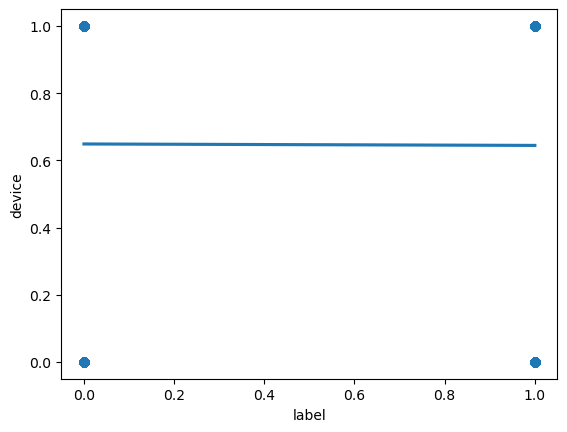

In [61]:
#Create a plot of your model to visualize results using the seaborn package.
sns.regplot(x = 'label', y = 'device', data = data_cleaned, logistic = True, ci = None)


## Results and Evaluation

In [63]:
# Predict the outcome for the test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1. 1. 1. ... 1. 1. 1.]


In [64]:
# Use predict_proba to output a probability.

clf.predict_proba(X_test)

array([[0.34969825, 0.65030175],
       [0.35440664, 0.64559336],
       [0.35440664, 0.64559336],
       ...,
       [0.35440664, 0.64559336],
       [0.34969825, 0.65030175],
       [0.35440664, 0.64559336]])

In [65]:
clf.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [69]:
#Print out the model's accuracy, precision, recall, and F1 score
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.642191
Precision: 0.642191
Recall: 1.000000
F1 Score: 0.782115


## Confusion Matrix

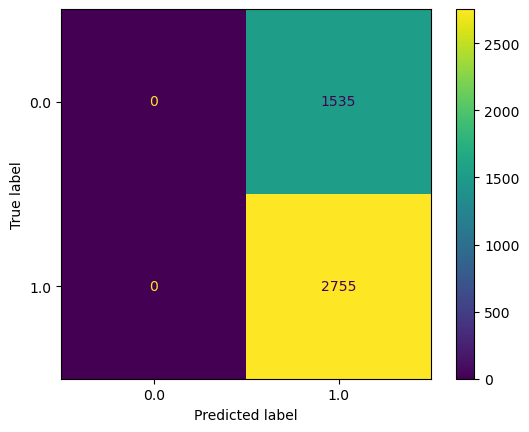

In [70]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()